# CH4 absorption bands from HiTRAN Database 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from hapi import *

HAPI version: 1.2.2.2
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2021 are now available in HAPI code

           MIT license: Copyright 2021 HITRAN team, see more at http://hitran.org. 

           If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005

           ATTENTION: This is the core version of the HITRAN Application Programming Interface.
                      For more efficient implementation of the absorption coefficient routine, 
                      as well as for new profiles, parameters and other functional,
      

# Verify Wavenumber-Wavelength Conversion

HiTRAN uses the "wavenumbers" (cm^-1) instead of the wavelength (nm or um). To convert from wavenumber to wavelength, we use this relationship: 

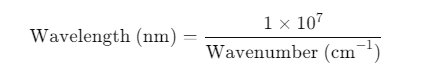
 
Note: Target the wavelenth range of interest i.e., where absorption bands happen. 

In [4]:
import contextlib

@contextlib.contextmanager
def suppress_output():
    with open('nul', 'w') as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout

# call the data from HiTRAN
db_begin('data')

# wavenumber range (in cm^-1)
nu1 = 4000  # ~2500 nm
nu2 = 8250  # ~1212 nm


with suppress_output():
    # call CH4 lines
    fetch('CH4', 6, 1, nu1, nu2) #number 6 shows the CH4 number in the HiTRAN list: https://hitran.org/docs/iso-meta/ 
    
    nu, coef = absorptionCoefficient_Lorentz(
        SourceTables='CH4',
        WavenumberRange=[nu1, nu2],
        Environment={'T': 296, 'p': 1} # T here is the temp and p is the pressure. 
    )


wavelength = 1e7 / nu  # Wavenumber (cm^-1) to Wavelength (nm)

# Sort the wavelengths
sorted_indices = np.argsort(wavelength)
wavelength_sorted = wavelength[sorted_indices]
coef_sorted = coef[sorted_indices]




Using data

CH4
                     Lines parsed: 135255


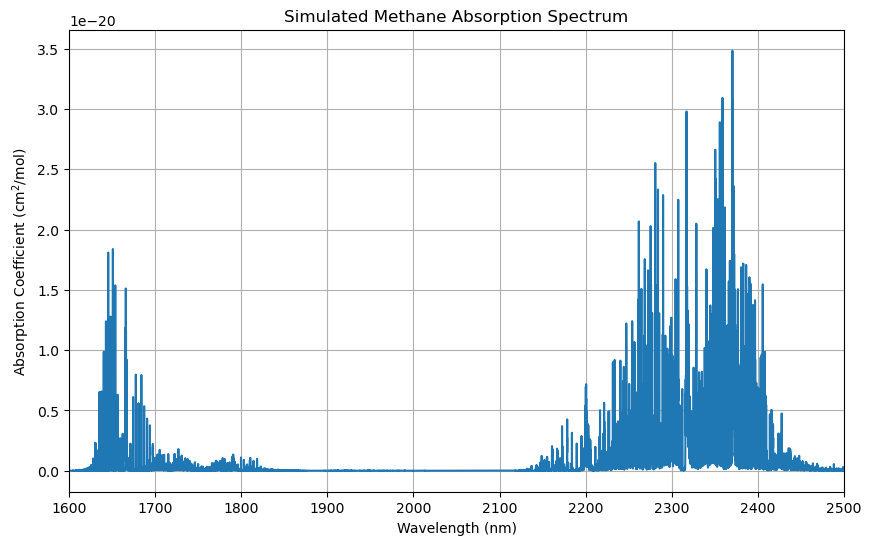

In [5]:
# Plot 
plt.figure(figsize=(10, 6))
plt.plot(wavelength_sorted, coef_sorted)
plt.title('Simulated Methane Absorption Spectrum')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorption Coefficient (cm$^2$/mol)')
plt.xlim(1600, 2500)
plt.grid()
plt.show()